## A. Importing Modules and Dataset

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVR

%matplotlib inline

In [113]:
df = pd.read_csv('./insurance.csv')

In [114]:
df.tail()

age  gender    bmi  children smoker     region  insurance_cost
1333   64  female 31.825         2     no  northeast       16069.085
1334   64  female 26.885         0    yes  northwest       29330.983
1335   64    male 26.410         0     no  northeast       14394.558
1336   64    male 36.960         2    yes  southeast       49577.662
1337   64    male 23.760         0    yes  southeast       26926.514

Task 1: Classification

Open a new Jupyter notebook and name it etivity3_classification.ipynb. In this notebook, first of all, replace the column `insurance_cost` with a binary column `insurance_cost_binary`, where `insurance_cost_binary` is 0 if the corresponding `insurance_cost` is less than or equal to the median insurance cost and 1 otherwise. Then train three classification pipelines with SVM, Random Forest and a third classifier of your choice as the final estimator, respectively, to train a model that predicts the value of `insurance_cost_binary`. 

Requirements:

For each classifier, include data preparation and dimensionality reduction steps in the main pipeline.
You can choose any classifier as the third one. Some options are MLPClassifier, Naive Bayes, and kNN, but you are not limited to them.
For the dimensionality reduction step use PCA, RFE and a third dimensionality reduction (incl. feature selection) technique in at least one pipeline.
Use grid search for hyperparameter tuning and replicate the process in the example notebook Tutorial 3-1 - Binary Classification.ipynb to evaluate and compare the models you have trained and pick the best one.
Summarise your experience in a markdown cell (max 150 words in a markdown cell).


In [115]:
# Define functions to encode binary variables as 0/1 
def binary_encode_smoker(x):
    return (x == 'yes').astype(int)

def binary_encode_gender(x):
    return (x == 'male').astype(int)


# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', StandardScaler(), ['age', 'bmi', 'children']),  # standard scaling for numerical columns
        ('categorical', OneHotEncoder(), ['region']),  # one-hot encode 'region' column
        ('gender', FunctionTransformer(func=binary_encode_gender, validate=False), ['gender']),  # encode 'gender' as binary
        ('smoker', FunctionTransformer(func=binary_encode_smoker, validate=False), ['smoker']),  # encode 'smoker' as binary
        ('target', FunctionTransformer(func=binary_insurance_cost, validate=False), ['insurance_cost'])  # transform insurance_cost to binary
    ], remainder='passthrough')),
])

# Example usage:
transformed_data = pipeline.fit_transform(df)

# Get the column names after transformation
transformed_columns = ['age', 'bmi', 'children', 'region_1', 'region_2', 'region_3', 'region_4', 'gender', 'smoker', 'insurance_cost_binary']

# Convert the transformed array to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

In [116]:
transformed_df

age    bmi  children  region_1  region_2  region_3  region_4  gender  \
0    -1.510  0.510    -0.079     0.000     0.000     1.000     0.000   1.000   
1    -1.510  0.564    -0.909     0.000     0.000     1.000     0.000   1.000   
2    -1.510 -0.713    -0.909     1.000     0.000     0.000     0.000   0.000   
3    -1.510  1.313     0.751     1.000     0.000     0.000     0.000   0.000   
4    -1.510  0.814    -0.909     1.000     0.000     0.000     0.000   0.000   
...     ...    ...       ...       ...       ...       ...       ...     ...   
1333  1.765  0.191     0.751     1.000     0.000     0.000     0.000   0.000   
1334  1.765 -0.620    -0.909     0.000     1.000     0.000     0.000   0.000   
1335  1.765 -0.698    -0.909     1.000     0.000     0.000     0.000   1.000   
1336  1.765  1.033     0.751     0.000     0.000     1.000     0.000   1.000   
1337  1.765 -1.132    -0.909     0.000     0.000     1.000     0.000   1.000   

      smoker  insurance_cost_binary  
0      0.000                  0.000  
1      0.000                  0.000  
2      0.000                  0.000  
3      0.000                  0.000  
4      0.000                  0.000  
...      ...                    ...  
1333   0.000                  1.000  
1334   1.000                  1.000  
1335   0.000                  1.000  
1336   1.000                  1.000  
1337   1.000                  1.000  

[1338 rows x 10 columns]

In [117]:
# Set pandas display options
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Generate summary statistics for the DataFrame
summary_stats = transformed_df.describe()
print(summary_stats)

           age      bmi  children  region_1  region_2  region_3  region_4  \
count 1338.000 1338.000  1338.000  1338.000  1338.000  1338.000  1338.000   
mean    -0.000   -0.000    -0.000     0.242     0.243     0.272     0.243   
std      1.000    1.000     1.000     0.429     0.429     0.445     0.429   
min     -1.510   -2.412    -0.909     0.000     0.000     0.000     0.000   
25%     -0.869   -0.716    -0.909     0.000     0.000     0.000     0.000   
50%     -0.015   -0.043    -0.079     0.000     0.000     0.000     0.000   
75%      0.840    0.661     0.751     0.000     0.000     1.000     0.000   
max      1.765    3.686     3.241     1.000     1.000     1.000     1.000   

        gender   smoker  insurance_cost_binary  
count 1338.000 1338.000               1338.000  
mean     0.505    0.205                  0.500  
std      0.500    0.404                  0.500  
min      0.000    0.000                  0.000  
25%      0.000    0.000                  0.000  
50%      1.0

In [118]:
# Split the data into features (X) and target (y) and the train/test sets
# Using the same split for all three models for consistency
X = transformed_df.drop(columns=['insurance_cost_binary'])
y = transformed_df['insurance_cost_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Similarly to the last etivity when I try handle everything in one pipeline I get an error that a column of a given name can't be found. In this case it's "region", I tried to write the SVM and data processing all in one as below but it says it can't find the region column despite the fact if I run head() on the dataframe I'm feeding it I can see region is there. 

In [ ]:
'''combined_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('numeric', StandardScaler(), ['age', 'bmi', 'children']),  # standard scaling for numerical columns
        ('categorical', OneHotEncoder(), ['region']),  # one-hot encode 'region' column
        ('gender', FunctionTransformer(func=binary_encode_gender, validate=False), ['gender']),  # encode 'gender' as binary
        ('smoker', FunctionTransformer(func=binary_encode_smoker, validate=False), ['smoker']),  # encode 'smoker' as binary
        ('target', FunctionTransformer(func=binary_insurance_cost, validate=False), ['insurance_cost'])  # transform insurance_cost to binary
    ], remainder='passthrough')),
    ('classifier', svm_model)  # Add the SVM classifier
])
'''

In [138]:
# SVM with PCA
pipeline_with_pca_only = Pipeline([
    ('pca', PCA(n_components=3)),  # PCA with 3 components
    ('classifier', svm_model)  # Add the SVM classifier
])

# Fit the combined pipeline
pipeline_with_pca_only.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_with_pca_only.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7723880597014925
Precision: 0.8829787234042553
Recall: 0.6240601503759399
F1 Score: 0.7312775330396475


In [120]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the RFE transformer
rfe = RFE(estimator=rf_model, n_features_to_select=5) 

# Define the pipeline with RFE and Random Forest Classifier
pipeline_with_rfe = Pipeline([
    ('feature_selection', rfe),  # Add RFE for feature selection
    ('classifier', rf_model)  # Add the Random Forest classifier
])

# Fit the combined pipeline
pipeline_with_rfe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_rfe = pipeline_with_rfe.predict(X_test)

# Evaluate the model
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)
precision_rf_rfe, recall_rf_rfe, f1_score_rf_rfe, _ = precision_recall_fscore_support(y_test, y_pred_rf_rfe, average='binary')

print("Random Forest Model with RFE:")
print("Accuracy:", accuracy_rf_rfe)
print("Precision:", precision_rf_rfe)
print("Recall:", recall_rf_rfe)
print("F1 Score:", f1_score_rf_rfe)

Random Forest Model:
Accuracy: 0.9402985074626866
Precision: 0.9834710743801653
Recall: 0.8947368421052632
F1 Score: 0.937007874015748


In [146]:
# Define the MLP classifier model
mlp_model = MLPClassifier(max_iter=5000, random_state=42)

# Define the LDA model
lda_model = LDA()

# Define the pipeline with LDA for dimensionality reduction and MLP classifier
pipeline_with_lda_mlp = Pipeline([
    ('lda', lda_model),            # Add LDA for dimensionality reduction
    ('classifier', mlp_model)      # Add the MLP classifier
])

# Fit the combined pipeline
pipeline_with_lda_mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda_mlp = pipeline_with_lda_mlp.predict(X_test)

# Evaluate the model
accuracy_lda_mlp = accuracy_score(y_test, y_pred_lda_mlp)
precision_lda_mlp, recall_lda_mlp, f1_score_lda_mlp, _ = precision_recall_fscore_support(y_test, y_pred_lda_mlp, average='binary')

print("MLP Classifier Model with LDA Dimensionality Reduction:")
print("Accuracy:", accuracy_lda_mlp)
print("Precision:", precision_lda_mlp)
print("Recall:", recall_lda_mlp)
print("F1 Score:", f1_score_lda_mlp)

MLP Classifier Model with LDA Dimensionality Reduction:
Accuracy: 0.9253731343283582
Precision: 0.952
Recall: 0.8947368421052632
F1 Score: 0.9224806201550387


In [147]:
def evaluate_model(X_test, y_test, model):
    if hasattr(model, "predict_proba"):
        # If the model supports predict_proba, use it
        _probabilities = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        # If the model supports decision_function, use it
        _probabilities = model.decision_function(X_test)
    else:
        raise AttributeError("Model does not support either predict_proba or decision_function.")
    
    # compute exact predictions for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


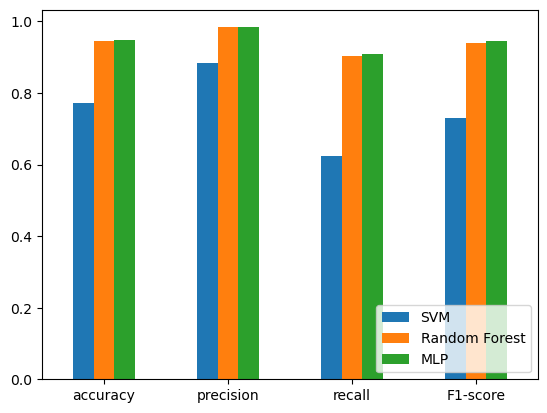

In [148]:
# Define parameter grids for each model
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1],
}

# Use GridSearchCV to perform grid search for each model
grid_search_svm = GridSearchCV(pipeline_with_pca_only, param_grid_svm, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(pipeline_with_rfe, param_grid_rf, cv=5, scoring='accuracy')
grid_search_mlp = GridSearchCV(pipeline_with_mlp, param_grid_mlp, cv=5, scoring='accuracy')

# Fit the grid search objects to the training data
grid_search_svm.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_mlp.fit(X_train, y_train)

# Evaluate the best models on the test data
SVM_best_model = grid_search_svm.best_estimator_
RF_best_model = grid_search_rf.best_estimator_
MLP_best_model = grid_search_mlp.best_estimator_

# Define the mean_fpr
mean_fpr = np.linspace(start=0, stop=1, num=100)

# Evaluate the best models using the evaluate_model function
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
MLP_accuracy, MLP_precision, MLP_recall, MLP_f1_score, MLP_tpr, MLP_auc = evaluate_model(X_test, y_test, MLP_best_model)

# Compare the performance metrics of the best models
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
MLP_metrics = np.array([MLP_accuracy, MLP_precision, MLP_recall, MLP_f1_score])

index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'MLP': MLP_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

From the above it looks as if MLP is slightly better than random forest and both are significantly better than SVM. However I don't think it's that simple as that. Before I added the three dimensionality reduction protocols (PCA, RFE, LDA) the MLP model performed similarly to the other two methods. I think potentially the reduction of the feature space to two dimensions in PCA is simply more extreme dimensionality reduction than the other methods and hence the model cannot be expected to be as accurate (but should run quicker). This steep drop off in performance before and after PCA is applied suggests this dataset and the relationship between the features and response variable may be too complex to reduce to two dimensions without significant loss of predictive power. PCA may be eliminating signal rather than noise.

Task 2: Regression

Open a new Jupyter notebook and name it etivity3_regression.ipynb. In this notebook, train three regression pipelines with Random Forest, Linear Regression and a third regressor of your choice as the final estimator, respectively, for predicting the value of `insurance_cost`.

Requirements:

For each regressor, include data preparation and dimensionality reduction steps in the main pipeline.
You can choose any regressor as the third one. Some options are SVR and MLPRegressor, but you are not limited to them.
For the dimensionality reduction step use PCA, RFE and a third dimensionality reduction (incl. feature selection) technique in at least one pipeline.
Use grid search for hyperparameter tuning and replicate the process in the example notebook Tutorial 3-2 - Regression and Dimensionality Reduction.ipynb to evaluate and compare the models you have trained and pick the best one.
Summarise your experience in a markdown cell (max 150 words in a markdown cell).

In [158]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest regression model
rf_reg_model = RandomForestRegressor(random_state=42)

# Define the PCA transformer
pca = PCA(n_components=3)

# Define the pipeline with PCA and Random Forest regression
pipeline_with_pca_rf_reg = Pipeline([
    ('pca', pca),  # Add PCA for dimensionality reduction
    ('regressor', rf_reg_model)  # Add the Random Forest regressor
])

# Fit the combined pipeline
pipeline_with_pca_rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_reg = pipeline_with_pca_rf_reg.predict(X_test)

# Evaluate the model
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print("Random Forest Regression Model with PCA:")
print("Mean Squared Error:", mse_rf_reg)
print("R^2 Score:", r2_rf_reg)

Random Forest Regression Model with PCA:
Mean Squared Error: 0.19011275342039805
R^2 Score: 0.23950663315696663


In [159]:
# Define the Linear Regression model
linear_model = LinearRegression()

# Define the RFE transformer
rfe = RFE(estimator=linear_model, n_features_to_select=5)

# Define the pipeline with RFE and Linear Regression
pipeline_with_rfe_linear = Pipeline([
    ('feature_selection', rfe),  # Add RFE for feature selection
    ('regressor', linear_model)  # Add the Linear Regression model
])

# Fit the combined pipeline
pipeline_with_rfe_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = pipeline_with_rfe_linear.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)

Linear Regression Model:
Mean Squared Error: 0.11400297836960886
R^2 Score: 0.5439626890326492


In [161]:
from sklearn.neural_network import MLPRegressor

# Define the number of components for LDA
n_components = min(X_train.shape[1], len(np.unique(y_train)) - 1)

# Define the pipeline with LDA dimensionality reduction and MLPRegressor
pipeline_mlp_lda = Pipeline([
    ('lda', LDA(n_components=n_components)),  # LDA for dimensionality reduction
    ('scaler', StandardScaler()),  # StandardScaler for scaling
    ('mlp', MLPRegressor())  # MLPRegressor
])

# Fit the pipeline to the training data
pipeline_mlp_lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp_lda = pipeline_mlp_lda.predict(X_test)

# Evaluate the model
mse_mlp_lda = mean_squared_error(y_test, y_pred_mlp_lda)

# Calculate R^2 score
r2_mlp_lda = r2_score(y_test, y_pred_mlp_lda)

print("MLPRegressor with LDA:")
print("Mean Squared Error ():", mse_mlp_lda)
print("R^2 Score (MLPRegressor with LDA):", r2_mlp_lda)

MLPRegressor with LDA:
Mean Squared Error (): 0.06259183453724568
R^2 Score (MLPRegressor with LDA): 0.7496187176940612


In [162]:
# Define parameter grids for each model
param_grid_rf_reg = {
    'pca__n_components': [2, 3, 4],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

param_grid_linear = {
    'feature_selection__n_features_to_select': [3, 5, 7, 10]
}

param_grid_mlp_lda = {
    'lda__n_components': [2, 3, 4],
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
}

# Use GridSearchCV to perform grid search for each model
grid_search_rf_reg = GridSearchCV(pipeline_with_pca_rf_reg, param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_linear = GridSearchCV(pipeline_with_rfe_linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_mlp_lda = GridSearchCV(pipeline_mlp_lda, param_grid_mlp_lda, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search objects to the training data
grid_search_rf_reg.fit(X_train, y_train)
grid_search_linear.fit(X_train, y_train)
grid_search_mlp_lda.fit(X_train, y_train)

# Get the best models
best_rf_reg_model = grid_search_rf_reg.best_estimator_
best_linear_model = grid_search_linear.best_estimator_
best_mlp_lda_model = grid_search_mlp_lda.best_estimator_

# Make predictions on the test set
y_pred_rf_reg = best_rf_reg_model.predict(X_test)
y_pred_linear = best_linear_model.predict(X_test)
y_pred_mlp_lda = best_mlp_lda_model.predict(X_test)

# Calculate mean squared error for each model
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_mlp_lda = mean_squared_error(y_test, y_pred_mlp_lda)

# Print mean squared error for each model
print("Mean Squared Error (Random Forest Regression with PCA):", mse_rf_reg)
print("Mean Squared Error (Linear Regression with RFE):", mse_linear)
print("Mean Squared Error (MLPRegressor with LDA):", mse_mlp_lda)

# Evaluate R^2 score for each model
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
r2_linear = r2_score(y_test, y_pred_linear)
r2_mlp_lda = r2_score(y_test, y_pred_mlp_lda)

# Print R^2 score for each model
print("R^2 Score (Random Forest Regression with PCA):", r2_rf_reg)
print("R^2 Score (Linear Regression with RFE):", r2_linear)
print("R^2 Score (MLPRegressor with LDA):", r2_mlp_lda)

ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/deanmcgarr/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py", line 614, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).
